Bu ödevde ABD Eğitim Sistemi'ne ait bir takım verileri inceleyeceksiniz. Öncelikle veri kümesini Kaggle'dan indirin. Burada eğitim sistemine ait bir çok veri kümesi bulunmaktadır. Bu ödevde 'states_all.csv' isimli veri kümesini kullanacaksınız.

Bu ödevi tamamlamak için, aşağıdaki soruların çözümlerini içeren Jupyter notebook dosyasının Github linkini gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

1.Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun.

In [2]:
import pandas as pd
import numpy as np
states = pd.read_csv("states_all.csv")

In [3]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [4]:
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [5]:
states2=states.copy()
states2=states2.drop(states2[states2['TOTAL_REVENUE'] > 50000000].index)

In [6]:
states2['TOTAL_REVENUE'].max()

49979753.0

In [7]:
states.isnull().sum()/states.isnull().count()*100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [8]:
max_p=states2['AVG_MATH_4_SCORE'].max()

In [9]:
states2[states2['AVG_MATH_4_SCORE']==max_p].TOTAL_REVENUE

1099    10848720.0
Name: TOTAL_REVENUE, dtype: float64

Matematik 4 skoru 80den büyük olan eyaletlerin total revenue ortalaması

In [10]:
states2[states2['AVG_MATH_4_SCORE']>250].TOTAL_REVENUE.mean()

10865628.222222222

Her yılın en yüksek matematik 8 notu


In [11]:
states2.groupby["YEAR"].max

TypeError: 'method' object is not subscriptable

2.Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?

In [12]:
states.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [13]:
states2=states.copy()
Col_list=['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
for x in Col_list:
    states2[x].fillna(states2[x].median(), inplace=True)


In [14]:
def 

SyntaxError: invalid syntax (<ipython-input-14-455680ca2399>, line 1)

In [21]:
Yüzde=states2.isnull().sum()/states2.isnull().count()*100
Eksik_adet=states2.isnull().sum()

In [24]:
df=pd.concat([Yüzde, Eksik_adet], axis=1, keys=["Yüzde", "Eksik_adet"])

In [46]:
def nullbul(df):
    Yüzde=df.isnull().sum()/df.isnull().count()*100
    Eksik_adet=df.isnull().sum()
    df=pd.concat([Yüzde, Eksik_adet], axis=1, keys=["Yüzde", "Eksik_adet"])
    return df [df["Eksik_adet"]>0].sort_values("Eksik_adet",ascending=False)

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

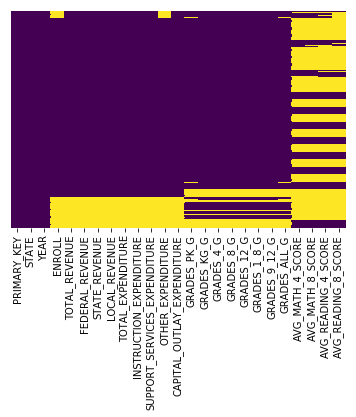

In [48]:
sns.heatmap(states.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

In [49]:
nullbul(states)

,Yüzde,Eksik_adet
AVG_READING_8_SCORE,66.621984,994
AVG_MATH_8_SCORE,64.343164,960
AVG_READING_4_SCORE,64.276139,959
AVG_MATH_4_SCORE,64.075067,956
OTHER_EXPENDITURE,17.627346,263
ENROLL,17.627346,263
INSTRUCTION_EXPENDITURE,14.209115,212
SUPPORT_SERVICES_EXPENDITURE,14.209115,212
TOTAL_EXPENDITURE,14.209115,212
CAPITAL_OUTLAY_EXPENDITURE,14.209115,212


3.Şimdi zaman faktörünü dikkate alma zamanı! 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.

In [16]:
states.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [74]:
states3=states.copy()

In [75]:
Col_list=['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
for Col in Col_list:
    states3[Col]=states3.groupby("YEAR")[Col].transform(lambda x : x.fillna(x.mean()))

In [77]:
states3.groupby("YEAR").mean()

,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,,,,,,,,,,,,,,,,,,,,,
1992,NaN,4.572764e+06,2.970296e+05,2.088314e+06,2.187420e+06,4.653591e+06,2.454000e+06,1.370149e+06,NaN,4.050078e+05,...,60724.875000,56872.357143,44038.767857,485748.410714,207994.392857,726734.666667,218.410116,266.360319,212.712256,263.307067
1993,802054.333333,4.768758e+06,3.086224e+05,2.209300e+06,2.250836e+06,4.788283e+06,2.540431e+06,1.419870e+06,248234.784314,4.096238e+05,...,61044.321429,59019.875000,43930.089286,491633.553571,212404.464286,738159.000000,NaN,NaN,NaN,NaN
1994,801383.960784,4.916678e+06,3.272233e+05,2.225664e+06,2.363790e+06,4.954213e+06,2.626080e+06,1.476894e+06,262916.705882,4.041495e+05,...,62184.750000,59953.285714,45072.160714,496646.464286,216987.839286,749170.222222,NaN,NaN,NaN,NaN
1995,858973.039216,5.476034e+06,3.546117e+05,2.555041e+06,2.566381e+06,5.526114e+06,2.931096e+06,1.616281e+06,295324.647059,4.765508e+05,...,62258.821429,60907.035714,45061.214286,502088.482143,222061.821429,760743.777778,NaN,NaN,NaN,NaN
1996,873930.607843,5.744172e+06,3.647964e+05,2.737296e+06,2.642080e+06,5.838049e+06,3.076873e+06,1.680742e+06,303516.137255,5.445423e+05,...,61709.245614,60714.894737,46054.245614,502958.631579,225201.280702,764874.909091,221.479509,270.182528,214.587049,261.412097
1997,888379.745098,6.115397e+06,3.869910e+05,2.940125e+06,2.788281e+06,6.193357e+06,3.245567e+06,1.762159e+06,305274.705882,6.359637e+05,...,62649.982456,60906.000000,47575.403509,507648.192982,228669.684211,773816.636364,NaN,NaN,NaN,NaN
1998,897509.058824,6.504525e+06,4.272517e+05,3.140750e+06,2.936523e+06,6.595780e+06,3.427786e+06,1.873964e+06,318956.098039,7.034032e+05,...,63126.655172,61054.206897,47627.310345,504449.672414,227326.982759,769850.535714,NaN,NaN,NaN,NaN
1999,905101.470588,6.954543e+06,4.747857e+05,3.390289e+06,3.089468e+06,7.068126e+06,3.633184e+06,1.999630e+06,334733.431373,7.937301e+05,...,64770.827586,61356.137931,48705.620690,508090.155172,230605.482759,777501.660714,NaN,NaN,NaN,NaN
2000,910446.705882,7.443181e+06,5.229861e+05,3.650809e+06,3.269385e+06,7.572106e+06,3.883017e+06,2.136325e+06,352342.941176,8.755735e+05,...,64045.983051,61031.152542,48223.338983,504013.627119,229663.101695,784420.321429,224.803526,273.028605,217.612609,262.687292


In [76]:
nullbul(states3)

,Yüzde,Eksik_adet
AVG_READING_8_SCORE,57.640751,860
AVG_READING_4_SCORE,57.640751,860
AVG_MATH_8_SCORE,57.640751,860
AVG_MATH_4_SCORE,57.640751,860
OTHER_EXPENDITURE,7.171582,107
ENROLL,7.171582,107
GRADES_PK_G,6.836461,102
GRADES_4_G,6.836461,102
GRADES_8_G,6.836461,102
GRADES_12_G,6.836461,102


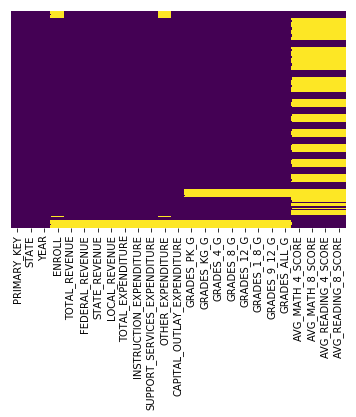

In [66]:
sns.heatmap(states3.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

In [64]:
nullbul(states)

,Yüzde,Eksik_adet
AVG_READING_8_SCORE,66.621984,994
AVG_MATH_8_SCORE,64.343164,960
AVG_READING_4_SCORE,64.276139,959
AVG_MATH_4_SCORE,64.075067,956
OTHER_EXPENDITURE,17.627346,263
ENROLL,17.627346,263
INSTRUCTION_EXPENDITURE,14.209115,212
SUPPORT_SERVICES_EXPENDITURE,14.209115,212
TOTAL_EXPENDITURE,14.209115,212
CAPITAL_OUTLAY_EXPENDITURE,14.209115,212


In [54]:
states3.isnull().sum()/states3.isnull().count()*100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

4.Bu sefer, eksik değerleri enterpolasyon yaparak doldurun.

In [80]:
states4=states.copy()

In [81]:
for col in Col_list:
    states4[col].interpolate(inplace=True)

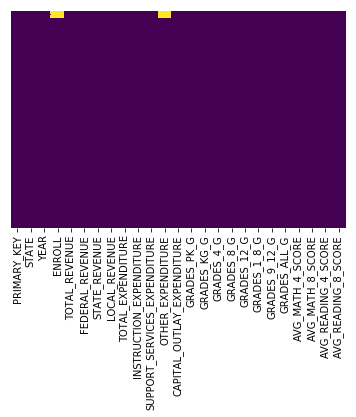

In [82]:
sns.heatmap(states4.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

5.İkinci, üçüncü ve dördüncü sorulardaki cevaplarınızı karşılaştırın. Anlamlı bir fark görebiliyor musunuz?